### Data Loading

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from processing_utils.feature_data_from_mat import load_subject_high_gamma

In [2]:
sig = True
zscore = False

Load in S14 Data

In [3]:
S14_hg_trace, S14_hg_map, S14_phon_labels = load_subject_high_gamma('S14', sig_channel=sig, zscore=zscore)

(144, 200, 111)
(144, 8, 16, 200)
(144, 3)


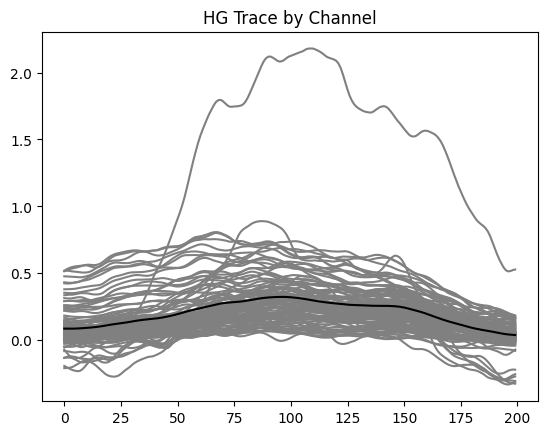

In [4]:
print(S14_hg_trace.shape)
print(S14_hg_map.shape)
print(S14_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S14_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S14_hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

Load in S26 Data

In [5]:
S26_hg_trace, S26_hg_map, S26_phon_labels = load_subject_high_gamma('S26', sig_channel=sig, zscore=zscore)

(148, 200, 111)
(148, 8, 16, 200)
(148, 3)


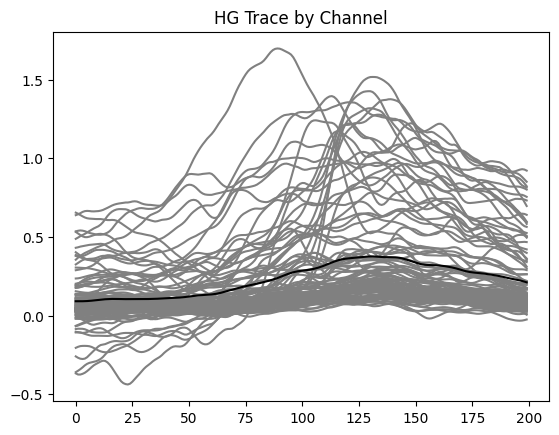

In [6]:
print(S26_hg_trace.shape)
print(S26_hg_map.shape)
print(S26_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S26_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S26_hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

Load in S23 Data

In [7]:
S23_hg_trace, S23_hg_map, S23_phon_labels = load_subject_high_gamma('S23', sig_channel=sig, zscore=zscore)

(151, 200, 63)
(151, 8, 16, 200)
(151, 3)


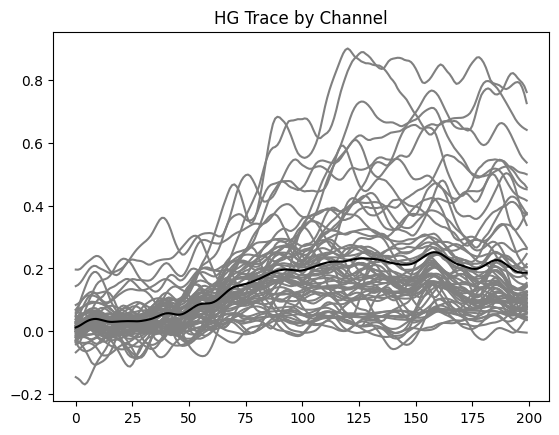

In [8]:
print(S23_hg_trace.shape)
print(S23_hg_map.shape)
print(S23_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S23_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S23_hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

Load in S33 Data

In [9]:
S33_hg_trace, S33_hg_map, S33_phon_labels = load_subject_high_gamma('S33', sig_channel=sig, zscore=zscore)

(46, 200, 149)
(46, 12, 24, 200)
(46, 3)


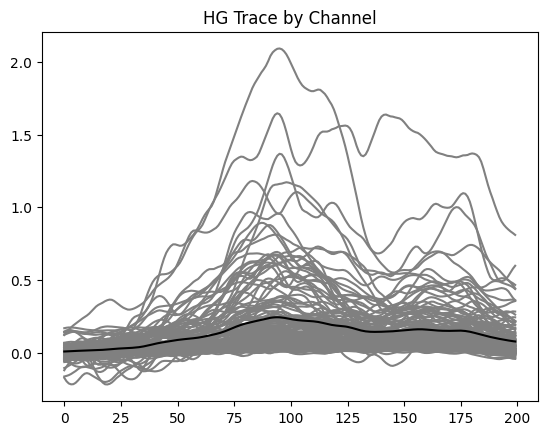

In [10]:
print(S33_hg_trace.shape)
print(S33_hg_map.shape)
print(S33_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S33_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S33_hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

Process data for use with 1/3 D CNN Bidirectional LSTM seq2seq

In [11]:
# imports
from processing_utils.sequence_processing import pad_sequence_teacher_forcing

In [12]:
# parameters
n_output = 10

In [13]:
X1 = S14_hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X1 = S14_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X1_prior, y1, prior1_labels, seq1_labels = pad_sequence_teacher_forcing(S14_phon_labels, n_output)  # first 2 outputs one-hot encoded

In [14]:
print(X1.shape, X1_prior.shape, y1.shape, prior1_labels.shape, seq1_labels.shape)

(144, 200, 111) (144, 3, 10) (144, 3, 10) (144, 3) (144, 3)


In [15]:
X2 = S26_hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X2 = S26_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X2_prior, y2, prior2_labels, seq2_labels = pad_sequence_teacher_forcing(S26_phon_labels, n_output)  # first 2 outputs one-hot encoded

In [16]:
print(X2.shape, X2_prior.shape, y2.shape, prior2_labels.shape, seq2_labels.shape)

(148, 200, 111) (148, 3, 10) (148, 3, 10) (148, 3) (148, 3)


In [17]:
X3 = S23_hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X2 = S23_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X3_prior, y3, prior3_labels, seq3_labels = pad_sequence_teacher_forcing(S23_phon_labels, n_output)  # first 2 outputs one-hot encoded

In [18]:
print(X3.shape, X3_prior.shape, y3.shape, prior3_labels.shape, seq3_labels.shape)

(151, 200, 63) (151, 3, 10) (151, 3, 10) (151, 3) (151, 3)


In [19]:
X4 = S33_hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X2 = S33_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X4_prior, y4, prior4_labels, seq4_labels = pad_sequence_teacher_forcing(S33_phon_labels, n_output)  # first 2 outputs one-hot encoded

In [20]:
print(X4.shape, X4_prior.shape, y4.shape, prior4_labels.shape, seq4_labels.shape)

(46, 200, 149) (46, 3, 10) (46, 3, 10) (46, 3) (46, 3)


Build 1D CNN Bidirectional LSTM seq2seq Model

In [21]:
# imports
from seq2seq_models.rnn_models import (lstm_1Dcnn_model, gru_1Dcnn_model,
                                       lstm_3Dcnn_model, gru_3Dcnn_model,
                                       stacked_lstm_1Dcnn_model)

In [22]:
# parameters

# 1D CNN
n_input_time = X1.shape[1]
n_input_channel = X1.shape[2]
filter_size = 10

# 3D CNN
# n_input_channel = [X1.shape[1], X1.shape[2]]
# n_input_time = X1.shape[3]
# filter_size = 2

n_filters = 50
n_layers = 1
n_units = 256
reg_lambda = 1e-6
dropout = 0.33
bidir = True

In [23]:
train_model, inf_enc, inf_dec = stacked_lstm_1Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_layers, n_units, reg_lambda, bidir=bidir)

In [26]:
print(train_model.summary())
# print(train_model.layers[-1].summary())
# print(inf_enc.summary())
# print(inf_enc.layers[-1].summary())
# print(inf_dec.summary())

Model: "training_lstm_final"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 111)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 20, 50)       55550       ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None, 10)]   0           []                               
                                                                                                  
 training_lstm_initial (Functio  (None, None, 10)    904714      ['conv1d[0][0]',                 
 nal)                                                             'input_2[0][0]

### Testing replacement of input and conv layers

In [ ]:
from seq2seq_models.rnn_model_components import linear_cnn_1D_module
n_channels = 17
conv_layer_idx = 1

input_layer = train_model.layers[conv_layer_idx - 1]
conv_layer = train_model.layers[conv_layer_idx]
reg_val = float(conv_layer.kernel_regularizer.l2)
new_inputs, new_conv_layer = linear_cnn_1D_module(
                                    input_layer.input_shape[0][1],
                                    n_channels, conv_layer.filters,
                                    conv_layer.kernel_size,
                                    reg_val)

In [ ]:
from keras.models import Model

encoder_inputs = new_conv_layer(new_inputs)
enc_dec = train_model.layers[-1]
new_model = Model([new_inputs, enc_dec.input[1]], enc_dec([encoder_inputs, enc_dec.input[1]]), name='new_model')

In [ ]:
new_model.summary()

### S26 Evaluation

In [ ]:
import time
from keras.optimizers import Adam
from train.train import train_seq2seq_kfold

In [ ]:
# parameters
num_folds = 10
num_reps = 1
batch_size = 200
epochs = 500
learning_rate = 5e-6

In [ ]:
train_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
histories, y_pred_all, y_test_all = train_seq2seq_kfold(train_model, inf_enc, inf_dec, X2, X2_prior, y2,
                                                        num_folds=num_folds, num_reps=num_reps,
                                                        batch_size=batch_size, epochs=epochs,
                                                        early_stop=False)
end = time.time()

In [ ]:
print(f'Time to train {num_folds} folds: {end-start} seconds')

In [ ]:
from visualization.plot_model_performance import extend_history_lists

histories = extend_history_lists(histories, epochs=epochs)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(np.array(histories['loss']).T, color='blue', alpha=0.35)
ax1.plot(np.mean(histories['loss'], axis=0), color='blue', label='Train')
ax1.plot(np.array(histories['val_loss']).T, color='orange', alpha=0.35)
ax1.plot(np.mean(histories['val_loss'], axis=0), color='orange', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(np.array(histories['accuracy']).T, color='blue', alpha=0.35)
ax2.plot(np.mean(histories['accuracy'], axis=0), color='blue', label='Train')
ax2.plot(np.array(histories['val_accuracy']).T, color='orange', alpha=0.35)
ax2.plot(np.mean(histories['val_accuracy'], axis=0), color='orange', label='Test')
# ax2.axhline(1/(n_output-1), color='gray', linestyle='--', label='Chance')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()

plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print(f'Balanced Accuracy: {balanced_accuracy_score(y_test_all, y_pred_all)}')

In [ ]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(histories, epochs=epochs)

### S33 Evaluation

In [ ]:
n_input_channel_transfer = X2.shape[2]
new_model, new_enc, new_dec = lstm_1Dcnn_model(n_input_time, n_input_channel_transfer,
                                               n_output, n_filters, filter_size, n_units,
                                               reg_lambda, bidir=bidir)

In [ ]:
from keras.optimizers import Adam

num_folds = 5
num_reps = 3
batch_size = 200
epochs = 500
learning_rate = 5e-6

new_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from train.train import train_seq2seq_kfold

histories, y_pred_all, y_test_all = train_seq2seq_kfold(new_model, new_enc, new_dec, X2, X2_prior, y2,
                                                        num_folds=num_folds, num_reps=num_reps,
                                                        batch_size=batch_size, epochs=epochs,
                                                        early_stop=False)

In [ ]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(np.array(histories['loss']).T, color='blue', alpha=0.35)
ax1.plot(np.mean(histories['loss'], axis=0), color='blue', label='Train')
ax1.plot(np.array(histories['val_loss']).T, color='orange', alpha=0.35)
ax1.plot(np.mean(histories['val_loss'], axis=0), color='orange', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(np.array(histories['accuracy']).T, color='blue', alpha=0.35)
ax2.plot(np.mean(histories['accuracy'], axis=0), color='blue', label='Train')
ax2.plot(np.array(histories['val_accuracy']).T, color='orange', alpha=0.35)
ax2.plot(np.mean(histories['val_accuracy'], axis=0), color='orange', label='Test')
# ax2.axhline(1/(n_output-1), color='gray', linestyle='--', label='Chance')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()

plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print(f'Balanced Accuracy: {balanced_accuracy_score(y_test_all, y_pred_all)}')

### Transfer Training S14 -> S26

In [ ]:
# imports
from keras.optimizers import Adam
from train.transfer_training import transfer_seq2seq_kfold

In [ ]:
trans_model, trans_enc, trans_dec = lstm_1Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_units, reg_lambda, bidir=bidir, dropout=dropout)
# trans_model, trans_enc, trans_dec = lstm_3Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_units, reg_lambda, bidir=bidir, dropout=dropout)
# trans_model, trans_enc, trans_dec = gru_1Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_units, reg_lambda, bidir=bidir, dropout=dropout)

In [ ]:
# parameters
num_folds = 5
batch_size = 200
epochs = 540
learning_rate = 1e-5

trans_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
models, histories, y_pred_all, y_test_all = transfer_seq2seq_kfold(trans_model, trans_enc, trans_dec, X1, X1_prior, y1, X2, X2_prior, y2, num_folds=num_folds, fine_tune_epochs=epochs)

In [ ]:
# from visualization.plot_model_performance import extend_t_hist_lists

# histories = extend_history_lists(histories, epochs=epochs)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(np.array(histories['loss']).T, color='blue', alpha=0.35)
ax1.plot(np.mean(histories['loss'], axis=0), color='blue', label='Train')
ax1.plot(np.array(histories['val_loss']).T, color='orange', alpha=0.35)
ax1.plot(np.mean(histories['val_loss'], axis=0), color='orange', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(np.array(histories['accuracy']).T, color='blue', alpha=0.35)
ax2.plot(np.mean(histories['accuracy'], axis=0), color='blue', label='Train')
ax2.plot(np.array(histories['val_accuracy']).T, color='orange', alpha=0.35)
ax2.plot(np.mean(histories['val_accuracy'], axis=0), color='orange', label='Test')
# ax2.axhline(1/(n_output-1), color='gray', linestyle='--', label='Chance')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()

plt.show()

In [ ]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(histories, epochs=epochs)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print('Balanced Accuracy: ', balanced_accuracy_score(y_test_all, y_pred_all))

### Transfer Training S26 -> S14

In [ ]:
# imports
from keras.optimizers import Adam
from train.transfer_training import transfer_seq2seq_kfold

In [ ]:
trans_model, trans_enc, trans_dec = lstm_1Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_units, reg_lambda, bidir=bidir)

In [ ]:
# parameters
num_folds = 5
batch_size = 200
# epochs = 500
learning_rate = 5e-6

trans_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
models2, histories2, y_pred2_all, y_test2_all = transfer_seq2seq_kfold(trans_model, trans_enc, trans_dec, X2, X2_prior, y2, X1, X1_prior, y1, num_folds=num_folds)

In [ ]:
# from visualization.plot_model_performance import extend_history_lists

# histories = extend_history_lists(histories, epochs=epochs)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(np.array(histories2['loss']).T, color='blue', alpha=0.35)
ax1.plot(np.mean(histories2['loss'], axis=0), color='blue', label='Train')
ax1.plot(np.array(histories2['val_loss']).T, color='orange', alpha=0.35)
ax1.plot(np.mean(histories2['val_loss'], axis=0), color='orange', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(np.array(histories2['accuracy']).T, color='blue', alpha=0.35)
ax2.plot(np.mean(histories2['accuracy'], axis=0), color='blue', label='Train')
ax2.plot(np.array(histories2['val_accuracy']).T, color='orange', alpha=0.35)
ax2.plot(np.mean(histories2['val_accuracy'], axis=0), color='orange', label='Test')
# ax2.axhline(1/(n_output-1), color='gray', linestyle='--', label='Chance')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()

plt.show()

In [ ]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(histories2, epochs=540)

### Transfer Training Diff Chans

In [ ]:
from train.transfer_training import transfer_seq2seq_kfold_diff_chans

In [ ]:
n_input_channel_transfer = X2.shape[2]
new_model, new_enc, new_dec = stacked_lstm_1Dcnn_model(n_input_time, n_input_channel_transfer,
                                                       n_output, n_filters, filter_size, n_layers,
                                                       n_units, reg_lambda, bidir=bidir)
new_model.summary()

In [ ]:
from keras.optimizers import Adam

num_folds = 5
batch_size = 200
pre_epochs = 3
c_epochs = 2
ft_epochs = 5
learning_rate = 1e-3

train_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
new_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
histories2, y_pred2_all, y_test2_all = transfer_seq2seq_kfold_diff_chans(train_model, inf_enc, inf_dec, new_model,
                                                                         new_enc, new_dec, X1, X1_prior, y1, X2,
                                                                         X2_prior, y2, num_folds=num_folds,
                                                                         pretrain_epochs=pre_epochs,
                                                                         conv_epochs=c_epochs,
                                                                         fine_tune_epochs=ft_epochs)

In [ ]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(histories2, epochs=pre_epochs + c_epochs + ft_epochs)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print('Balanced Accuracy: ', balanced_accuracy_score(y_test2_all, y_pred2_all))

### Transfer Train Chain

In [27]:
from train.transfer_training import transfer_train_chain

In [28]:
from keras.optimizers import Adam

num_folds = 5
batch_size = 200
pre_epochs = 200
c_epochs = 60
ft_epochs = 540
learning_rate = 1e-3

train_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
chain_model, chain_enc, t_hist = transfer_train_chain(
                                    train_model, inf_enc,
                                    inf_dec, [X1, X3, X4],
                                    [X1_prior, X3_prior, X4_prior],
                                    [y1, y3, y4],
                                    X2, X2_prior, y2,
                                    pre_val=[([X1, X1_prior], y1), ([X3, X3_prior], y3), ([X4, X4_prior], y4)],
                                    tar_val=([X2, X2_prior], y2),
                                    pretrain_epochs=pre_epochs, conv_epochs=c_epochs,
                                    target_epochs=ft_epochs)

Epoch 1/200
1/1 [==============================] - 0s 275ms/step - loss: 3.3344 - accuracy: 0.4375 - val_loss: 5.4516 - val_accuracy: 0.2963 - seq2seq_val_loss: 5.5628 - seq2seq_val_accuracy: 0.2804
Epoch 2/200
1/1 [==============================] - 0s 161ms/step - loss: 5.4516 - accuracy: 0.2963 - val_loss: 4.9412 - val_accuracy: 0.1273 - seq2seq_val_loss: 5.1034 - seq2seq_val_accuracy: 0.1158
Epoch 3/200
1/1 [==============================] - 0s 158ms/step - loss: 4.9412 - accuracy: 0.1273 - val_loss: 2.0293 - val_accuracy: 0.3866 - seq2seq_val_loss: 2.2540 - seq2seq_val_accuracy: 0.2715
Epoch 4/200
1/1 [==============================] - 0s 138ms/step - loss: 2.0293 - accuracy: 0.3866 - val_loss: 1.9843 - val_accuracy: 0.2708 - seq2seq_val_loss: 2.1932 - seq2seq_val_accuracy: 0.2030
Epoch 5/200
1/1 [==============================] - 0s 137ms/step - loss: 1.9843 - accuracy: 0.2708 - val_loss: 1.9237 - val_accuracy: 0.3472 - seq2seq_val_loss: 2.1642 - seq2seq_val_accuracy: 0.2281
Epoch

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 137ms/step - loss: 1.9237 - accuracy: 0.3472 - val_loss: 1.7976 - val_accuracy: 0.3565 - seq2seq_val_loss: 2.0839 - seq2seq_val_accuracy: 0.2704
Epoch 7/200
1/1 [==============================] - 0s 133ms/step - loss: 1.7976 - accuracy: 0.3565 - val_loss: 1.6663 - val_accuracy: 0.4306 - seq2seq_val_loss: 1.9913 - seq2seq_val_accuracy: 0.2680
Epoch 8/200
1/1 [==============================] - 0s 129ms/step - loss: 1.6663 - accuracy: 0.4306 - val_loss: 1.5450 - val_accuracy: 0.4306 - seq2seq_val_loss: 1.9001 - seq2seq_val_accuracy: 0.2873
Epoch 9/200
1/1 [==============================] - 0s 130ms/step - loss: 1.5450 - accuracy: 0.4306 - val_loss: 1.3968 - val_accuracy: 0.4954 - seq2seq_val_loss: 1.8128 - seq2seq_val_accuracy: 0.3120
Epoch 10/200
1/1 [==============================] - 0s 132ms/step - loss: 1.3968 - accuracy: 0.4954 - val_loss: 1.3470 - val_accuracy: 0.5023 - seq2seq_val_loss: 1.8080 - seq2seq_val_accuracy: 0.3340
Epoch 11/200
1/1

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 98ms/step - loss: 3.4152 - accuracy: 0.1449 - val_loss: 3.3090 - val_accuracy: 0.1522 - seq2seq_val_loss: 3.4820 - seq2seq_val_accuracy: 0.1492
Epoch 14/60
1/1 [==============================] - 0s 121ms/step - loss: 3.3090 - accuracy: 0.1522 - val_loss: 3.2132 - val_accuracy: 0.1522 - seq2seq_val_loss: 3.3840 - seq2seq_val_accuracy: 0.1387
Epoch 15/60
1/1 [==============================] - ETA: 0s - loss: 3.2132 - accuracy: 0.1522

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 110ms/step - loss: 3.2132 - accuracy: 0.1522 - val_loss: 3.1168 - val_accuracy: 0.1594 - seq2seq_val_loss: 3.2868 - seq2seq_val_accuracy: 0.1387
Epoch 16/60
1/1 [==============================] - 0s 107ms/step - loss: 3.1168 - accuracy: 0.1594 - val_loss: 3.0175 - val_accuracy: 0.1449 - seq2seq_val_loss: 3.1924 - seq2seq_val_accuracy: 0.1387
Epoch 17/60
1/1 [==============================] - ETA: 0s - loss: 3.0175 - accuracy: 0.1449

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 99ms/step - loss: 3.0175 - accuracy: 0.1449 - val_loss: 2.9258 - val_accuracy: 0.1522 - seq2seq_val_loss: 3.1097 - seq2seq_val_accuracy: 0.1442
Epoch 18/60
1/1 [==============================] - 0s 98ms/step - loss: 2.9258 - accuracy: 0.1522 - val_loss: 2.8380 - val_accuracy: 0.1812 - seq2seq_val_loss: 3.0341 - seq2seq_val_accuracy: 0.1577
Epoch 19/60
1/1 [==============================] - 0s 96ms/step - loss: 2.8380 - accuracy: 0.1812 - val_loss: 2.7484 - val_accuracy: 0.1957 - seq2seq_val_loss: 2.9583 - seq2seq_val_accuracy: 0.1483


d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 20/60
1/1 [==============================] - 0s 96ms/step - loss: 2.7484 - accuracy: 0.1957 - val_loss: 2.6596 - val_accuracy: 0.2101 - seq2seq_val_loss: 2.8835 - seq2seq_val_accuracy: 0.1645
Epoch 21/60
1/1 [==============================] - 0s 98ms/step - loss: 2.6596 - accuracy: 0.2101 - val_loss: 2.5810 - val_accuracy: 0.2101 - seq2seq_val_loss: 2.8221 - seq2seq_val_accuracy: 0.1698
Epoch 22/60
1/1 [==============================] - 0s 99ms/step - loss: 2.5810 - accuracy: 0.2101 - val_loss: 2.5107 - val_accuracy: 0.2246 - seq2seq_val_loss: 2.7733 - seq2seq_val_accuracy: 0.1777


d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 23/60
1/1 [==============================] - 0s 102ms/step - loss: 2.5107 - accuracy: 0.2246 - val_loss: 2.4441 - val_accuracy: 0.2464 - seq2seq_val_loss: 2.7296 - seq2seq_val_accuracy: 0.1827
Epoch 24/60
1/1 [==============================] - 0s 99ms/step - loss: 2.4441 - accuracy: 0.2464 - val_loss: 2.3770 - val_accuracy: 0.2609 - seq2seq_val_loss: 2.6782 - seq2seq_val_accuracy: 0.1880
Epoch 25/60
1/1 [==============================] - ETA: 0s - loss: 2.3770 - accuracy: 0.2609

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 100ms/step - loss: 2.3770 - accuracy: 0.2609 - val_loss: 2.3172 - val_accuracy: 0.2754 - seq2seq_val_loss: 2.6256 - seq2seq_val_accuracy: 0.2126
Epoch 26/60
1/1 [==============================] - 0s 104ms/step - loss: 2.3172 - accuracy: 0.2754 - val_loss: 2.2674 - val_accuracy: 0.2826 - seq2seq_val_loss: 2.5835 - seq2seq_val_accuracy: 0.2129
Epoch 27/60
1/1 [==============================] - 0s 100ms/step - loss: 2.2674 - accuracy: 0.2826 - val_loss: 2.2228 - val_accuracy: 0.3333 - seq2seq_val_loss: 2.5477 - seq2seq_val_accuracy: 0.2192


d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 28/60
1/1 [==============================] - 0s 99ms/step - loss: 2.2228 - accuracy: 0.3333 - val_loss: 2.1786 - val_accuracy: 0.3333 - seq2seq_val_loss: 2.5156 - seq2seq_val_accuracy: 0.2271
Epoch 29/60
1/1 [==============================] - 0s 102ms/step - loss: 2.1786 - accuracy: 0.3333 - val_loss: 2.1362 - val_accuracy: 0.3261 - seq2seq_val_loss: 2.4839 - seq2seq_val_accuracy: 0.1990
Epoch 30/60
1/1 [==============================] - ETA: 0s - loss: 2.1362 - accuracy: 0.3261

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 110ms/step - loss: 2.1362 - accuracy: 0.3261 - val_loss: 2.0959 - val_accuracy: 0.3406 - seq2seq_val_loss: 2.4501 - seq2seq_val_accuracy: 0.1825
Epoch 31/60
1/1 [==============================] - 0s 120ms/step - loss: 2.0959 - accuracy: 0.3406 - val_loss: 2.0623 - val_accuracy: 0.3478 - seq2seq_val_loss: 2.4224 - seq2seq_val_accuracy: 0.2047
Epoch 32/60
1/1 [==============================] - ETA: 0s - loss: 2.0623 - accuracy: 0.3478

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 96ms/step - loss: 2.0623 - accuracy: 0.3478 - val_loss: 2.0344 - val_accuracy: 0.3406 - seq2seq_val_loss: 2.3996 - seq2seq_val_accuracy: 0.2053
Epoch 33/60
1/1 [==============================] - 0s 106ms/step - loss: 2.0344 - accuracy: 0.3406 - val_loss: 2.0064 - val_accuracy: 0.3188 - seq2seq_val_loss: 2.3730 - seq2seq_val_accuracy: 0.2029
Epoch 34/60
1/1 [==============================] - 0s 99ms/step - loss: 2.0064 - accuracy: 0.3188 - val_loss: 1.9768 - val_accuracy: 0.3116 - seq2seq_val_loss: 2.3407 - seq2seq_val_accuracy: 0.1981


d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 35/60
1/1 [==============================] - 0s 98ms/step - loss: 1.9768 - accuracy: 0.3116 - val_loss: 1.9448 - val_accuracy: 0.3261 - seq2seq_val_loss: 2.3035 - seq2seq_val_accuracy: 0.2082
Epoch 36/60
1/1 [==============================] - 0s 99ms/step - loss: 1.9448 - accuracy: 0.3261 - val_loss: 1.9111 - val_accuracy: 0.3333 - seq2seq_val_loss: 2.2629 - seq2seq_val_accuracy: 0.2285
Epoch 37/60
1/1 [==============================] - 0s 99ms/step - loss: 1.9111 - accuracy: 0.3333 - val_loss: 1.8769 - val_accuracy: 0.3406 - seq2seq_val_loss: 2.2212 - seq2seq_val_accuracy: 0.2232
Epoch 38/60
1/1 [==============================] - 0s 98ms/step - loss: 1.8769 - accuracy: 0.3406 - val_loss: 1.8429 - val_accuracy: 0.3478 - seq2seq_val_loss: 2.1802 - seq2seq_val_accuracy: 0.2837
Epoch 39/60
1/1 [==============================] - 0s 96ms/step - loss: 1.8429 - accuracy: 0.3478 - val_loss: 1.8099 - val_accuracy: 0.3696 - seq2seq_val_loss: 2.1410 - seq2seq_val_accuracy: 0.2916
Epoch 40/6

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 53/60
1/1 [==============================] - 0s 111ms/step - loss: 1.4467 - accuracy: 0.5072 - val_loss: 1.4227 - val_accuracy: 0.5072 - seq2seq_val_loss: 1.7522 - seq2seq_val_accuracy: 0.3579
Epoch 54/60
1/1 [==============================] - 0s 103ms/step - loss: 1.4227 - accuracy: 0.5072 - val_loss: 1.3948 - val_accuracy: 0.5145 - seq2seq_val_loss: 1.7265 - seq2seq_val_accuracy: 0.3526
Epoch 55/60
1/1 [==============================] - 0s 99ms/step - loss: 1.3948 - accuracy: 0.5145 - val_loss: 1.3696 - val_accuracy: 0.5217 - seq2seq_val_loss: 1.7020 - seq2seq_val_accuracy: 0.3519
Epoch 56/60
1/1 [==============================] - 0s 98ms/step - loss: 1.3696 - accuracy: 0.5217 - val_loss: 1.3471 - val_accuracy: 0.5362 - seq2seq_val_loss: 1.6768 - seq2seq_val_accuracy: 0.3654


d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 57/60
1/1 [==============================] - 0s 105ms/step - loss: 1.3471 - accuracy: 0.5362 - val_loss: 1.3260 - val_accuracy: 0.5435 - seq2seq_val_loss: 1.6502 - seq2seq_val_accuracy: 0.3784
Epoch 58/60
1/1 [==============================] - 0s 97ms/step - loss: 1.3260 - accuracy: 0.5435 - val_loss: 1.3042 - val_accuracy: 0.5580 - seq2seq_val_loss: 1.6241 - seq2seq_val_accuracy: 0.3869
Epoch 59/60
1/1 [==============================] - 0s 105ms/step - loss: 1.3042 - accuracy: 0.5580 - val_loss: 1.2832 - val_accuracy: 0.5725 - seq2seq_val_loss: 1.6008 - seq2seq_val_accuracy: 0.4178
Epoch 60/60
1/1 [==============================] - 0s 99ms/step - loss: 1.2832 - accuracy: 0.5725 - val_loss: 1.2629 - val_accuracy: 0.5797 - seq2seq_val_loss: 1.5786 - seq2seq_val_accuracy: 0.4314
Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 1.2629 - accuracy: 0.5797 - val_loss: 1.3120 - val_accuracy: 0.5435 - seq2seq_val_loss: 1.8214 - seq2seq_val_accuracy: 0.3596
Epoch 2/20

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 128ms/step - loss: 2.5980 - accuracy: 0.1239 - val_loss: 2.5873 - val_accuracy: 0.1284 - seq2seq_val_loss: 2.6348 - seq2seq_val_accuracy: 0.1125
Epoch 18/60
1/1 [==============================] - 0s 144ms/step - loss: 2.5873 - accuracy: 0.1284 - val_loss: 2.5767 - val_accuracy: 0.1441 - seq2seq_val_loss: 2.6252 - seq2seq_val_accuracy: 0.1220
Epoch 19/60
1/1 [==============================] - ETA: 0s - loss: 2.5767 - accuracy: 0.1441

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 131ms/step - loss: 2.5767 - accuracy: 0.1441 - val_loss: 2.5660 - val_accuracy: 0.1509 - seq2seq_val_loss: 2.6160 - seq2seq_val_accuracy: 0.1251
Epoch 20/60
1/1 [==============================] - 0s 126ms/step - loss: 2.5660 - accuracy: 0.1509 - val_loss: 2.5555 - val_accuracy: 0.1509 - seq2seq_val_loss: 2.6072 - seq2seq_val_accuracy: 0.1112
Epoch 21/60
1/1 [==============================] - ETA: 0s - loss: 2.5555 - accuracy: 0.1509

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 126ms/step - loss: 2.5555 - accuracy: 0.1509 - val_loss: 2.5455 - val_accuracy: 0.1441 - seq2seq_val_loss: 2.5991 - seq2seq_val_accuracy: 0.1074
Epoch 22/60
1/1 [==============================] - 0s 125ms/step - loss: 2.5455 - accuracy: 0.1441 - val_loss: 2.5360 - val_accuracy: 0.1419 - seq2seq_val_loss: 2.5915 - seq2seq_val_accuracy: 0.1051
Epoch 23/60
1/1 [==============================] - ETA: 0s - loss: 2.5360 - accuracy: 0.1419

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 132ms/step - loss: 2.5360 - accuracy: 0.1419 - val_loss: 2.5273 - val_accuracy: 0.1419 - seq2seq_val_loss: 2.5848 - seq2seq_val_accuracy: 0.1103
Epoch 24/60
1/1 [==============================] - 0s 157ms/step - loss: 2.5273 - accuracy: 0.1419 - val_loss: 2.5192 - val_accuracy: 0.1419 - seq2seq_val_loss: 2.5784 - seq2seq_val_accuracy: 0.1127
Epoch 25/60
1/1 [==============================] - 0s 133ms/step - loss: 2.5192 - accuracy: 0.1419 - val_loss: 2.5113 - val_accuracy: 0.1419 - seq2seq_val_loss: 2.5722 - seq2seq_val_accuracy: 0.1125
Epoch 26/60
1/1 [==============================] - 0s 137ms/step - loss: 2.5113 - accuracy: 0.1419 - val_loss: 2.5036 - val_accuracy: 0.1396 - seq2seq_val_loss: 2.5658 - seq2seq_val_accuracy: 0.1149
Epoch 27/60
1/1 [==============================] - 0s 144ms/step - loss: 2.5036 - accuracy: 0.1396 - val_loss: 2.4958 - val_accuracy: 0.1486 - seq2seq_val_loss: 2.5590 - seq2seq_val_accuracy: 0.1192
Epoch 28/60
1/1 [

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 127ms/step - loss: 2.3904 - accuracy: 0.2027 - val_loss: 2.3873 - val_accuracy: 0.2050 - seq2seq_val_loss: 2.4600 - seq2seq_val_accuracy: 0.1441
Epoch 52/60
1/1 [==============================] - 0s 125ms/step - loss: 2.3873 - accuracy: 0.2050 - val_loss: 2.3841 - val_accuracy: 0.2050 - seq2seq_val_loss: 2.4566 - seq2seq_val_accuracy: 0.1495
Epoch 53/60
1/1 [==============================] - ETA: 0s - loss: 2.3841 - accuracy: 0.2050

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 128ms/step - loss: 2.3841 - accuracy: 0.2050 - val_loss: 2.3810 - val_accuracy: 0.2027 - seq2seq_val_loss: 2.4532 - seq2seq_val_accuracy: 0.1478
Epoch 54/60
1/1 [==============================] - 0s 136ms/step - loss: 2.3810 - accuracy: 0.2027 - val_loss: 2.3779 - val_accuracy: 0.2072 - seq2seq_val_loss: 2.4498 - seq2seq_val_accuracy: 0.1478
Epoch 55/60
1/1 [==============================] - ETA: 0s - loss: 2.3779 - accuracy: 0.2072

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 129ms/step - loss: 2.3779 - accuracy: 0.2072 - val_loss: 2.3748 - val_accuracy: 0.2117 - seq2seq_val_loss: 2.4463 - seq2seq_val_accuracy: 0.1496
Epoch 56/60
1/1 [==============================] - 0s 128ms/step - loss: 2.3748 - accuracy: 0.2117 - val_loss: 2.3716 - val_accuracy: 0.2140 - seq2seq_val_loss: 2.4429 - seq2seq_val_accuracy: 0.1478
Epoch 57/60
1/1 [==============================] - ETA: 0s - loss: 2.3716 - accuracy: 0.2140

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 131ms/step - loss: 2.3716 - accuracy: 0.2140 - val_loss: 2.3685 - val_accuracy: 0.2162 - seq2seq_val_loss: 2.4395 - seq2seq_val_accuracy: 0.1512
Epoch 58/60
1/1 [==============================] - 0s 132ms/step - loss: 2.3685 - accuracy: 0.2162 - val_loss: 2.3655 - val_accuracy: 0.2185 - seq2seq_val_loss: 2.4362 - seq2seq_val_accuracy: 0.1555
Epoch 59/60
1/1 [==============================] - ETA: 0s - loss: 2.3655 - accuracy: 0.2185

d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 159ms/step - loss: 2.3655 - accuracy: 0.2185 - val_loss: 2.3624 - val_accuracy: 0.2207 - seq2seq_val_loss: 2.4330 - seq2seq_val_accuracy: 0.1600
Epoch 60/60
1/1 [==============================] - 0s 128ms/step - loss: 2.3624 - accuracy: 0.2207 - val_loss: 2.3595 - val_accuracy: 0.2230 - seq2seq_val_loss: 2.4298 - seq2seq_val_accuracy: 0.1582
Epoch 1/540


d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 4s 4s/step - loss: 2.3595 - accuracy: 0.2230 - val_loss: 2.1649 - val_accuracy: 0.2095 - seq2seq_val_loss: 2.2798 - seq2seq_val_accuracy: 0.1445
Epoch 2/540
1/1 [==============================] - 0s 160ms/step - loss: 2.1649 - accuracy: 0.2095 - val_loss: 2.0464 - val_accuracy: 0.2748 - seq2seq_val_loss: 2.2059 - seq2seq_val_accuracy: 0.1566
Epoch 3/540
1/1 [==============================] - 0s 144ms/step - loss: 2.0464 - accuracy: 0.2748 - val_loss: 1.8598 - val_accuracy: 0.2995 - seq2seq_val_loss: 2.1544 - seq2seq_val_accuracy: 0.1727
Epoch 4/540
1/1 [==============================] - 0s 161ms/step - loss: 1.8598 - accuracy: 0.2995 - val_loss: 1.7493 - val_accuracy: 0.3536 - seq2seq_val_loss: 2.1188 - seq2seq_val_accuracy: 0.2177
Epoch 5/540
1/1 [==============================] - 0s 163ms/step - loss: 1.7493 - accuracy: 0.3536 - val_loss: 1.6530 - val_accuracy: 0.3221 - seq2seq_val_loss: 2.0769 - seq2seq_val_accuracy: 0.1854
Epoch 6/540
1/1 [===

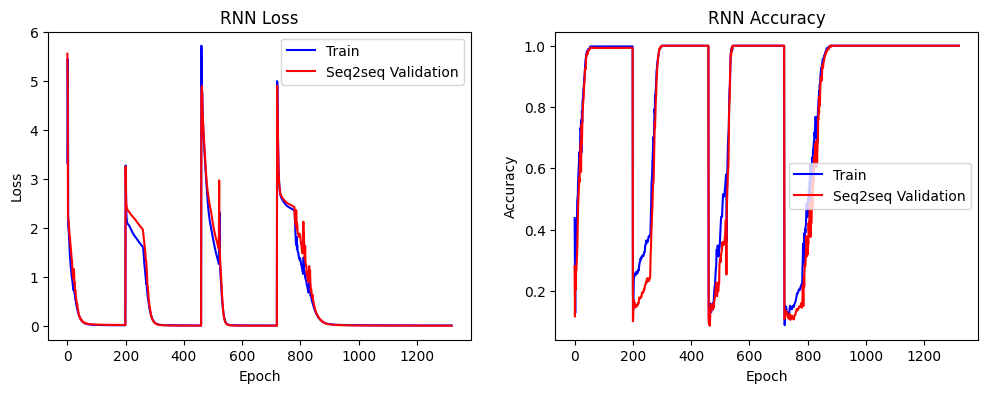

In [35]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(t_hist.history['loss'], color='blue', label='Train')
# ax1.plot(t_hist.history['val_loss'], color='orange', label='Validation')
ax1.plot(t_hist.history['seq2seq_val_loss'], color='red', label='Seq2seq Validation')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(t_hist.history['accuracy'], color='blue', label='Train')
# ax2.plot(t_hist.history['val_accuracy'], color='orange', label='Validation')
ax2.plot(t_hist.history['seq2seq_val_accuracy'], color='red', label='Seq2seq Validation')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()


plt.show()